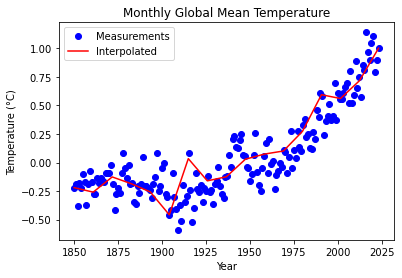

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# This script performs 1-dimensional optimal interpolation. The reduction in the number of data points can be reduced by 
# your liking. 
# If your dataset contains missing values please refer to Interpolate_missing_values.ipynb in the repository. 
# used dataset: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/1/4/1850-2023/data.csv
# last edit 15.06.2023 by Mathis Pohl

############### Changeable Parameters ###############
opt_int_change = 10 # percent change of number of x-values e.g. number measurements. 
                    # Example: 10 reduces the number of interpolation points to 10 % of the original measurements
kind = 'linear'     # kind of interpolation
                    # can be: ‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’
                    # for more information please refer to the skipy manual: 
                    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
#####################################################

# Read the data from a text file, skipping the header row
data = np.loadtxt('monthly_global_mean_temp.txt', delimiter = ',', skiprows = 1)

# Extract the Year and Value columns
time_obs = data[:, 0]
values   = data[:, 1]


# Define the new time points for interpolation
time_interp = np.linspace(time_obs[0], time_obs[len(time_obs)-1], round(len(time_obs)*opt_int_change/100))  

# Perform optimal interpolation
interpolated_values = interp1d(time_obs, values, kind = kind)(time_interp)

# Plot the observation values and interpolated values
plt.plot(time_obs, values, 'bo', label = 'Measurements')
plt.plot(time_interp, interpolated_values, 'r-', label = 'Interpolated')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Monthly Global Mean Temperature')
plt.show()
